In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as sp
import ast
import math

In [133]:
testFS = "./src/testFS.txt"
testMSE = "./src/testMSE.txt"
testBox = "./src/testBox.txt"
testBox2 = "./src/testBox2.txt"

with open(testFS, 'r') as file:
    FSstring = file.read()

FSdata =np.array(ast.literal_eval(FSstring))

with open(testMSE, 'r') as file:
    MSEstring = file.read()
    
MSEdata = np.array(ast.literal_eval(MSEstring))

with open(testBox, 'r') as file:
    testBoxstring = file.read()
    
Boxplotdata = np.array(ast.literal_eval(testBoxstring))

with open(testBox2, 'r') as file:
    testBoxstring2 = file.read()
    
Boxplotdata2 = np.array(ast.literal_eval(testBoxstring2))

print(Boxplotdata)


[list([])
 list([3.17362194079962e-07, -2.8629300413002268e-08, -1.4795597275130135e-07, -1.0650722936933477e-07])
 list([2.1451427306695692e-07, 1.0221089041806408e-07, -2.55978418253755e-08, 1.4345602109000488e-07, 2.423291829700691e-08, 3.0633761838316786e-07, -2.663444709227747e-07, 2.2662493465164246e-07, -1.879105722968344e-07, 2.610570535577228e-07, -1.1594207538490053e-08, 1.4838497039426635e-07, -1.9841506579409973e-07, -3.8170526227288004e-07, -6.631527260658743e-08, 5.1183434601753675e-08, -2.1562499263189094e-07, -1.8834951445723114e-08, -3.9948511701415335e-07, 5.773999724179024e-08, -2.229033795736468e-07, -3.064205077313309e-07, -6.260142917935418e-08, 1.2327295676600736e-07, 2.214585781562528e-07, 7.223360422997649e-08, -2.2772607562171476e-07, 1.6368289833604277e-07, 2.082737462355544e-08, 1.0473053227433304e-07, -2.707496500470308e-07])
 list([3.281254270653955e-07, 3.56611036742005e-08, -1.7039080339731338e-07, 1.668642859997682e-08, -1.70820214667744e-07, 7.84193707

## Histogram

(0, 1.4)

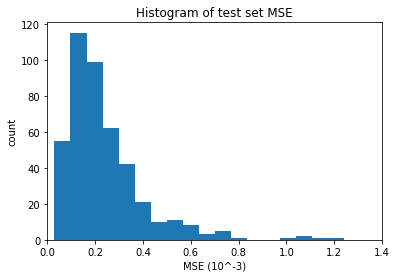

In [63]:
MSEdataScaled = MSEdata*1000
n = math.ceil((MSEdataScaled.max() - MSEdataScaled.min())/0.07)
plt.hist(MSEdataScaled, bins=n)
plt.title("Histogram of test set MSE")
plt.ylabel("count")
plt.xlabel("MSE (10^-3)")
plt.xlim([0, 1.4])

(0, 1.4)

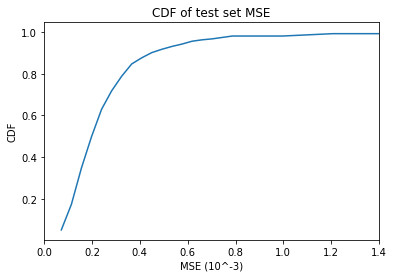

In [124]:
count,bins_count = np.histogram(MSEdataScaled, bins=40)

pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
cdf = np.cumsum(pdf)
  
# plotting CDF
plt.plot(bins_count[1:], cdf, label="CDF")
plt.title("CDF of test set MSE")
plt.ylabel("CDF")
plt.xlabel("MSE (10^-3)")
plt.xlim([0, 1.4])

## Scatterplot (figure 6E)

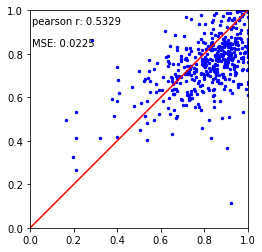

In [106]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from sklearn.metrics import mean_squared_error
  
measured, predicted = FSdata[:,0], FSdata[:,1]

# Calculationg pearson r
pearsonr = sp.pearsonr(measured,predicted)[0]

# Calculation of Mean Squared Error (MSE)
MSE = mean_squared_error(measured,predicted)

#Plot measured vs. predicted frameshift ratio
fig, ax = plt.subplots()
ax.scatter(measured,predicted, c='blue',s=6)
ax.set_xlim((0,1))
ax.set_ylim((0,1))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
ax.text(0.01, 0.95,"pearson r: " + str(round(pearsonr,4)),
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)
ax.text(0.01, 0.85,"MSE: " + str(round(MSE,4)),
     horizontalalignment='left',
     verticalalignment='center',
     transform = ax.transAxes)
plt.show()

## Boxplot (figure S6E)

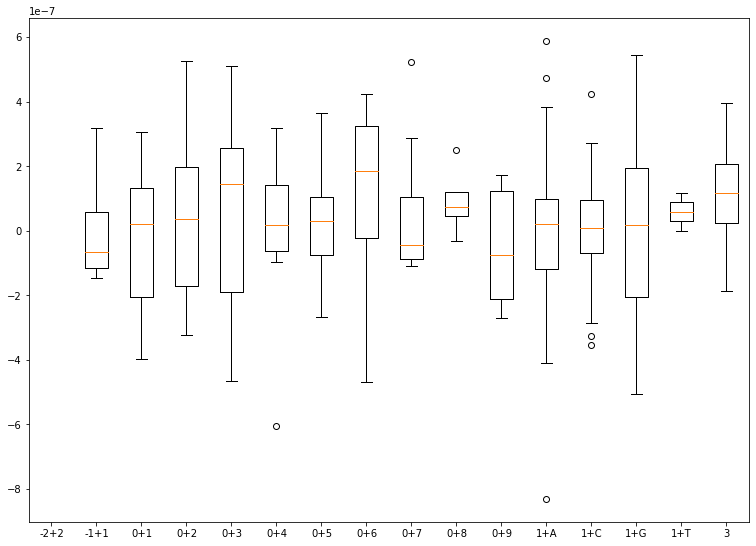

In [125]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
labels = ['-2+2', '-1+1','0+1','0+2','0+3','0+4','0+5','0+6','0+7','0+8','0+9','1+A','1+C','1+G','1+T','3']

bp = ax.boxplot(Boxplotdata,labels=labels)
 
plt.show()

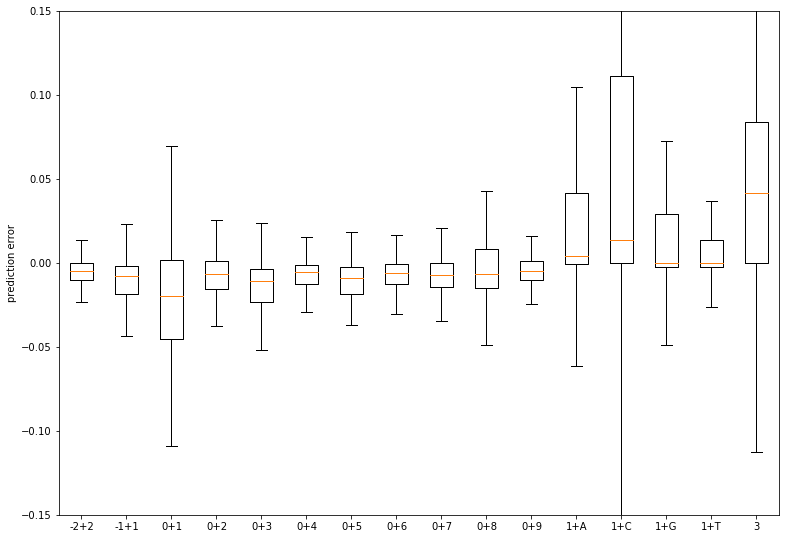

In [147]:
dataArray = []
for i in range(0,16):
    dataArray.append(Boxplotdata2[i])
    
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
labels = ['-2+2', '-1+1','0+1','0+2','0+3','0+4','0+5','0+6','0+7','0+8','0+9','1+A','1+C','1+G','1+T','3']

bp = ax.boxplot(dataArray,labels=labels,showfliers=False)

plt.ylabel("prediction error")
plt.ylim([-0.15, 0.15])

plt.show()